<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Heart_disease_prediction_using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the Google drive
from google.colab import drive
drive.mount('/content/drive')

#Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the Heart Disease Dataset
Heart_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/heart.csv')

In [ ]:
#Getting an Overview of the Hert Disease dataset
print(Heart_data.head())  # View the first few rows of the dataset
print(Heart_data.info())  # Get information about the dataset, including data types and missing values
print(Heart_data.describe())  # Get summary statistics of the numerical attributes


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [ ]:
Heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


DATA PREPROCESSING

In [ ]:
# Check for missing values
print(Heart_data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = Heart_data[Heart_data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2      

In [ ]:
# Check for duplicate columns
duplicate_cols = Heart_data.columns[Heart_data.columns.duplicated()]
print("Duplicate Columns:")
print(duplicate_cols)

Duplicate Columns:
Index([], dtype='object')


In [ ]:
# Handle duplicate rows (if any)
Heart_data.drop_duplicates(inplace=True)


In [ ]:
# Check the cleaned dataset
print(Heart_data.head())
print(Heart_data.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5 

In [ ]:
#Summary Table for Target variable
summary_table = Heart_data['target'].value_counts().reset_index()
summary_table.columns = ['target', 'Count']
print("Summary Table for Target variable:")
print(summary_table)

Summary Table for Target variable:
   target  Count
0       1    164
1       0    138


In [ ]:
# Summary Table
summary_table = Heart_data['sex'].value_counts().reset_index()
summary_table.columns = ['Sex', 'Count']
print("Summary Table:")
print(summary_table)


Summary Table:
   Sex  Count
0    1    206
1    0     96


In [ ]:
# Frequency Table
frequency_table = pd.crosstab(index=Heart_data['sex'], columns='Count')
print("\nFrequency Table:")
print(frequency_table)


Frequency Table:
col_0  Count
sex         
0         96
1        206


In [ ]:
# Categorical Attributes
categorical_attributes = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Creating a Summary and Frequency Tables for each categorical attribute
for attribute in categorical_attributes:
    # Summary Table
    summary_table = Heart_data[attribute].value_counts().reset_index()
    summary_table.columns = [attribute, 'Count']
    print(f"\nSummary Table for '{attribute}':")
    print(summary_table)

    # Frequency Table
    frequency_table = pd.crosstab(index=Heart_data[attribute], columns='Count')
    print(f"\nFrequency Table for '{attribute}':")
    print(frequency_table)


Summary Table for 'cp':
   cp  Count
0   0    143
1   2     86
2   1     50
3   3     23

Frequency Table for 'cp':
col_0  Count
cp          
0        143
1         50
2         86
3         23

Summary Table for 'fbs':
   fbs  Count
0    0    257
1    1     45

Frequency Table for 'fbs':
col_0  Count
fbs         
0        257
1         45

Summary Table for 'restecg':
   restecg  Count
0        1    151
1        0    147
2        2      4

Frequency Table for 'restecg':
col_0    Count
restecg       
0          147
1          151
2            4

Summary Table for 'exang':
   exang  Count
0      0    203
1      1     99

Frequency Table for 'exang':
col_0  Count
exang       
0        203
1         99

Summary Table for 'slope':
   slope  Count
0      2    141
1      1    140
2      0     21

Frequency Table for 'slope':
col_0  Count
slope       
0         21
1        140
2        141

Summary Table for 'ca':
   ca  Count
0   0    175
1   1     65
2   2     38
3   3     20
4   4      4


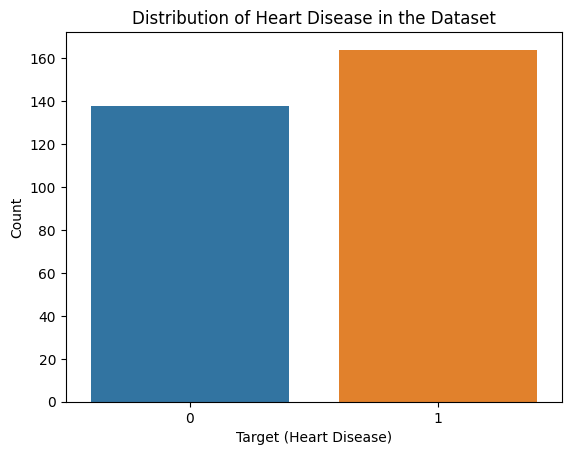

In [ ]:
#Exploring the target variable
sns.countplot(x='target', data=Heart_data)
plt.xlabel('Target (Heart Disease)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease in the Dataset')
plt.show()


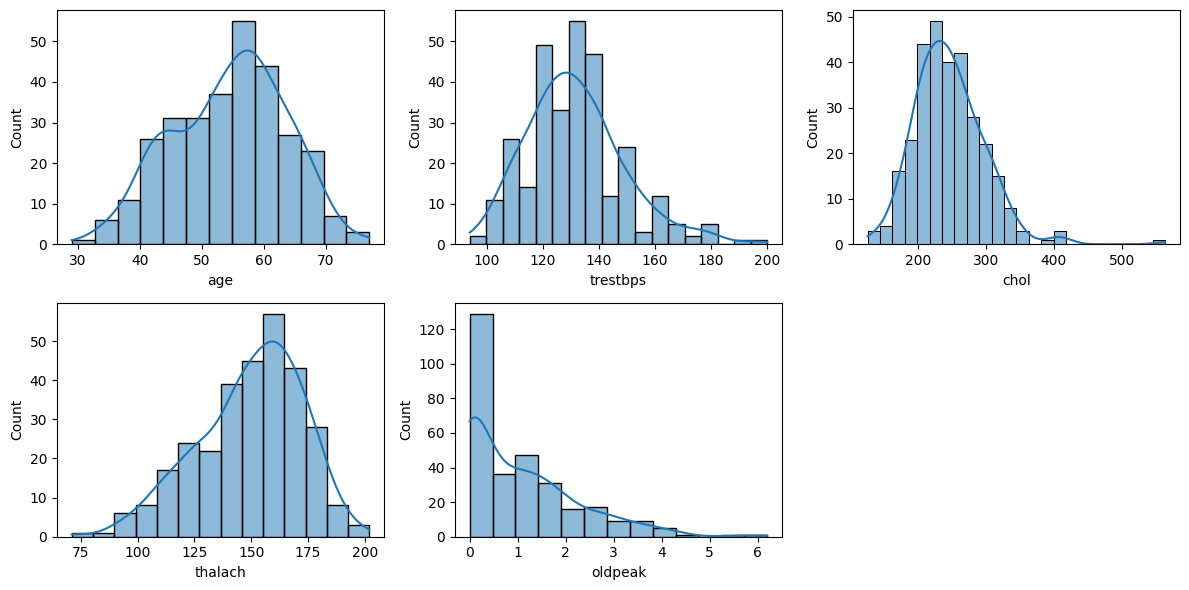

In [ ]:
#Visualize the distribution of numerical attributes
num_attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, attribute in enumerate(num_attributes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(Heart_data[attribute], kde=True)
    plt.xlabel(attribute)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


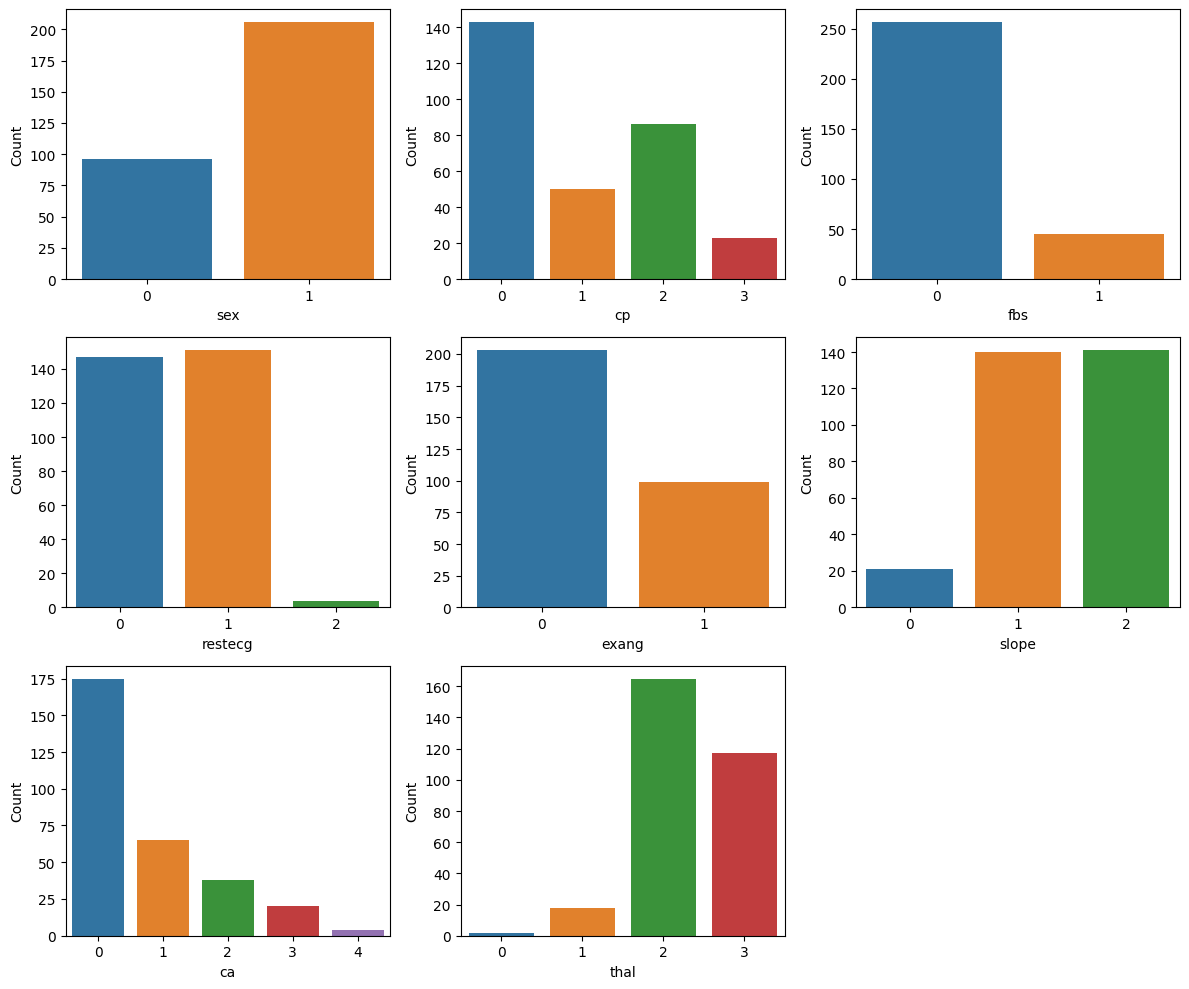

In [ ]:
#Distribution of categorical variables
cat_attributes = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(12, 10))
for i, attribute in enumerate(cat_attributes, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=attribute, data=Heart_data)
    plt.xlabel(attribute)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


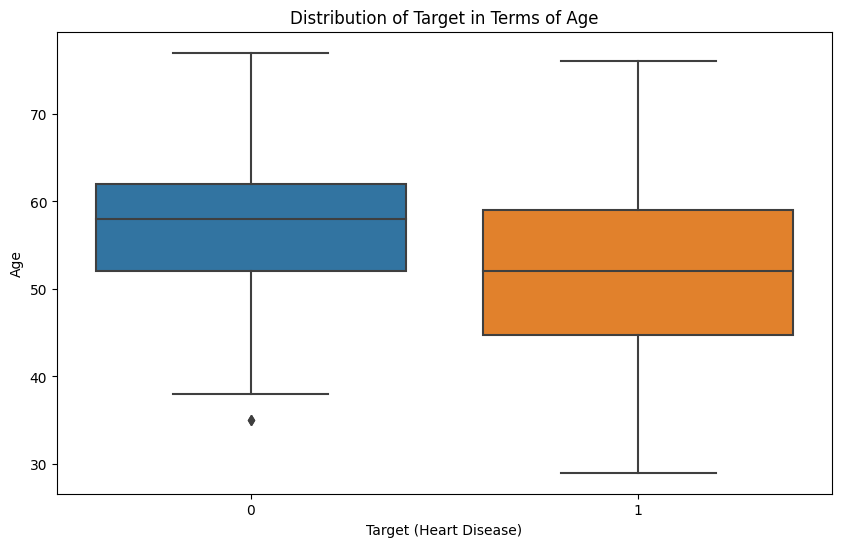

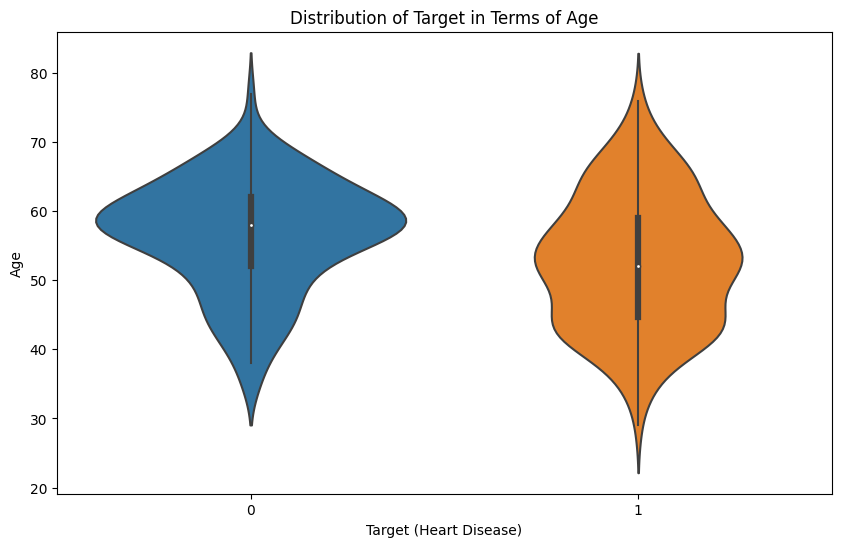

In [ ]:
# Create a box plot or violin plot to show the distribution of target variable across age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=Heart_data)
plt.xlabel('Target (Heart Disease)')
plt.ylabel('Age')
plt.title('Distribution of Target in Terms of Age')
plt.show()
#In the box plot or violin plot, the x-axis represents the target variable (0 = no disease, 1 = disease), and the y-axis represents the age. The plot will show how the age values are distributed for each target class. The box plot will display the quartiles and any potential outliers, while the violin plot will show the kernel density estimation of the data.

#This visualization provides insights into how the age distribution differs between individuals with and without heart disease, helping us to understand any potential associations or trends between age and heart disease occurrence.


# Create a violin plot to show the distribution of target variable across age groups
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='age', data=Heart_data)
plt.xlabel('Target (Heart Disease)')
plt.ylabel('Age')
plt.title('Distribution of Target in Terms of Age')
plt.show()
# The x-axis represents the target variable (0 = no disease, 1 = disease), and the y-axis represents the age.
 #The width of each violin plot corresponds to the data density at different age levels for each target class.
 #The shape of the violin plot provides insights into the data's distribution, including any peaks or variations.
#This visualization will help us observe how the age distribution differs between individuals with and without heart disease,
# allowing us to identify any patterns or trends related to age and heart disease occurrence more effectively.



Summary Table - Distribution of Target in Terms of Sex:
        No Heart Disease  Heart Disease  Total
Female                24             72     96
Male                 114             92    206
Total                138            164    302


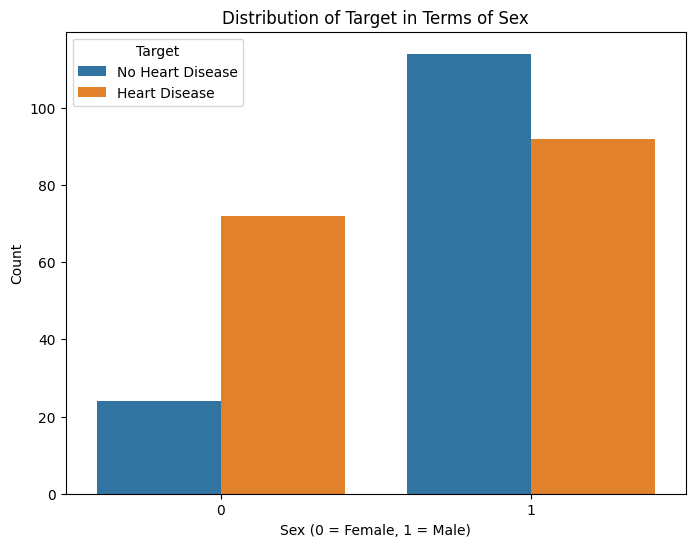

In [ ]:
#  summary table using crosstab showing distribution of target among sex
summary_table = pd.crosstab(Heart_data['sex'], Heart_data['target'], margins=True, margins_name="Total")
summary_table.columns = ['No Heart Disease', 'Heart Disease', 'Total']
summary_table.index = ['Female', 'Male', 'Total']

print("Summary Table - Distribution of Target in Terms of Sex:")
print(summary_table)

# A count plot to show the distribution of target variable across sex categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=Heart_data)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Distribution of Target in Terms of Sex')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

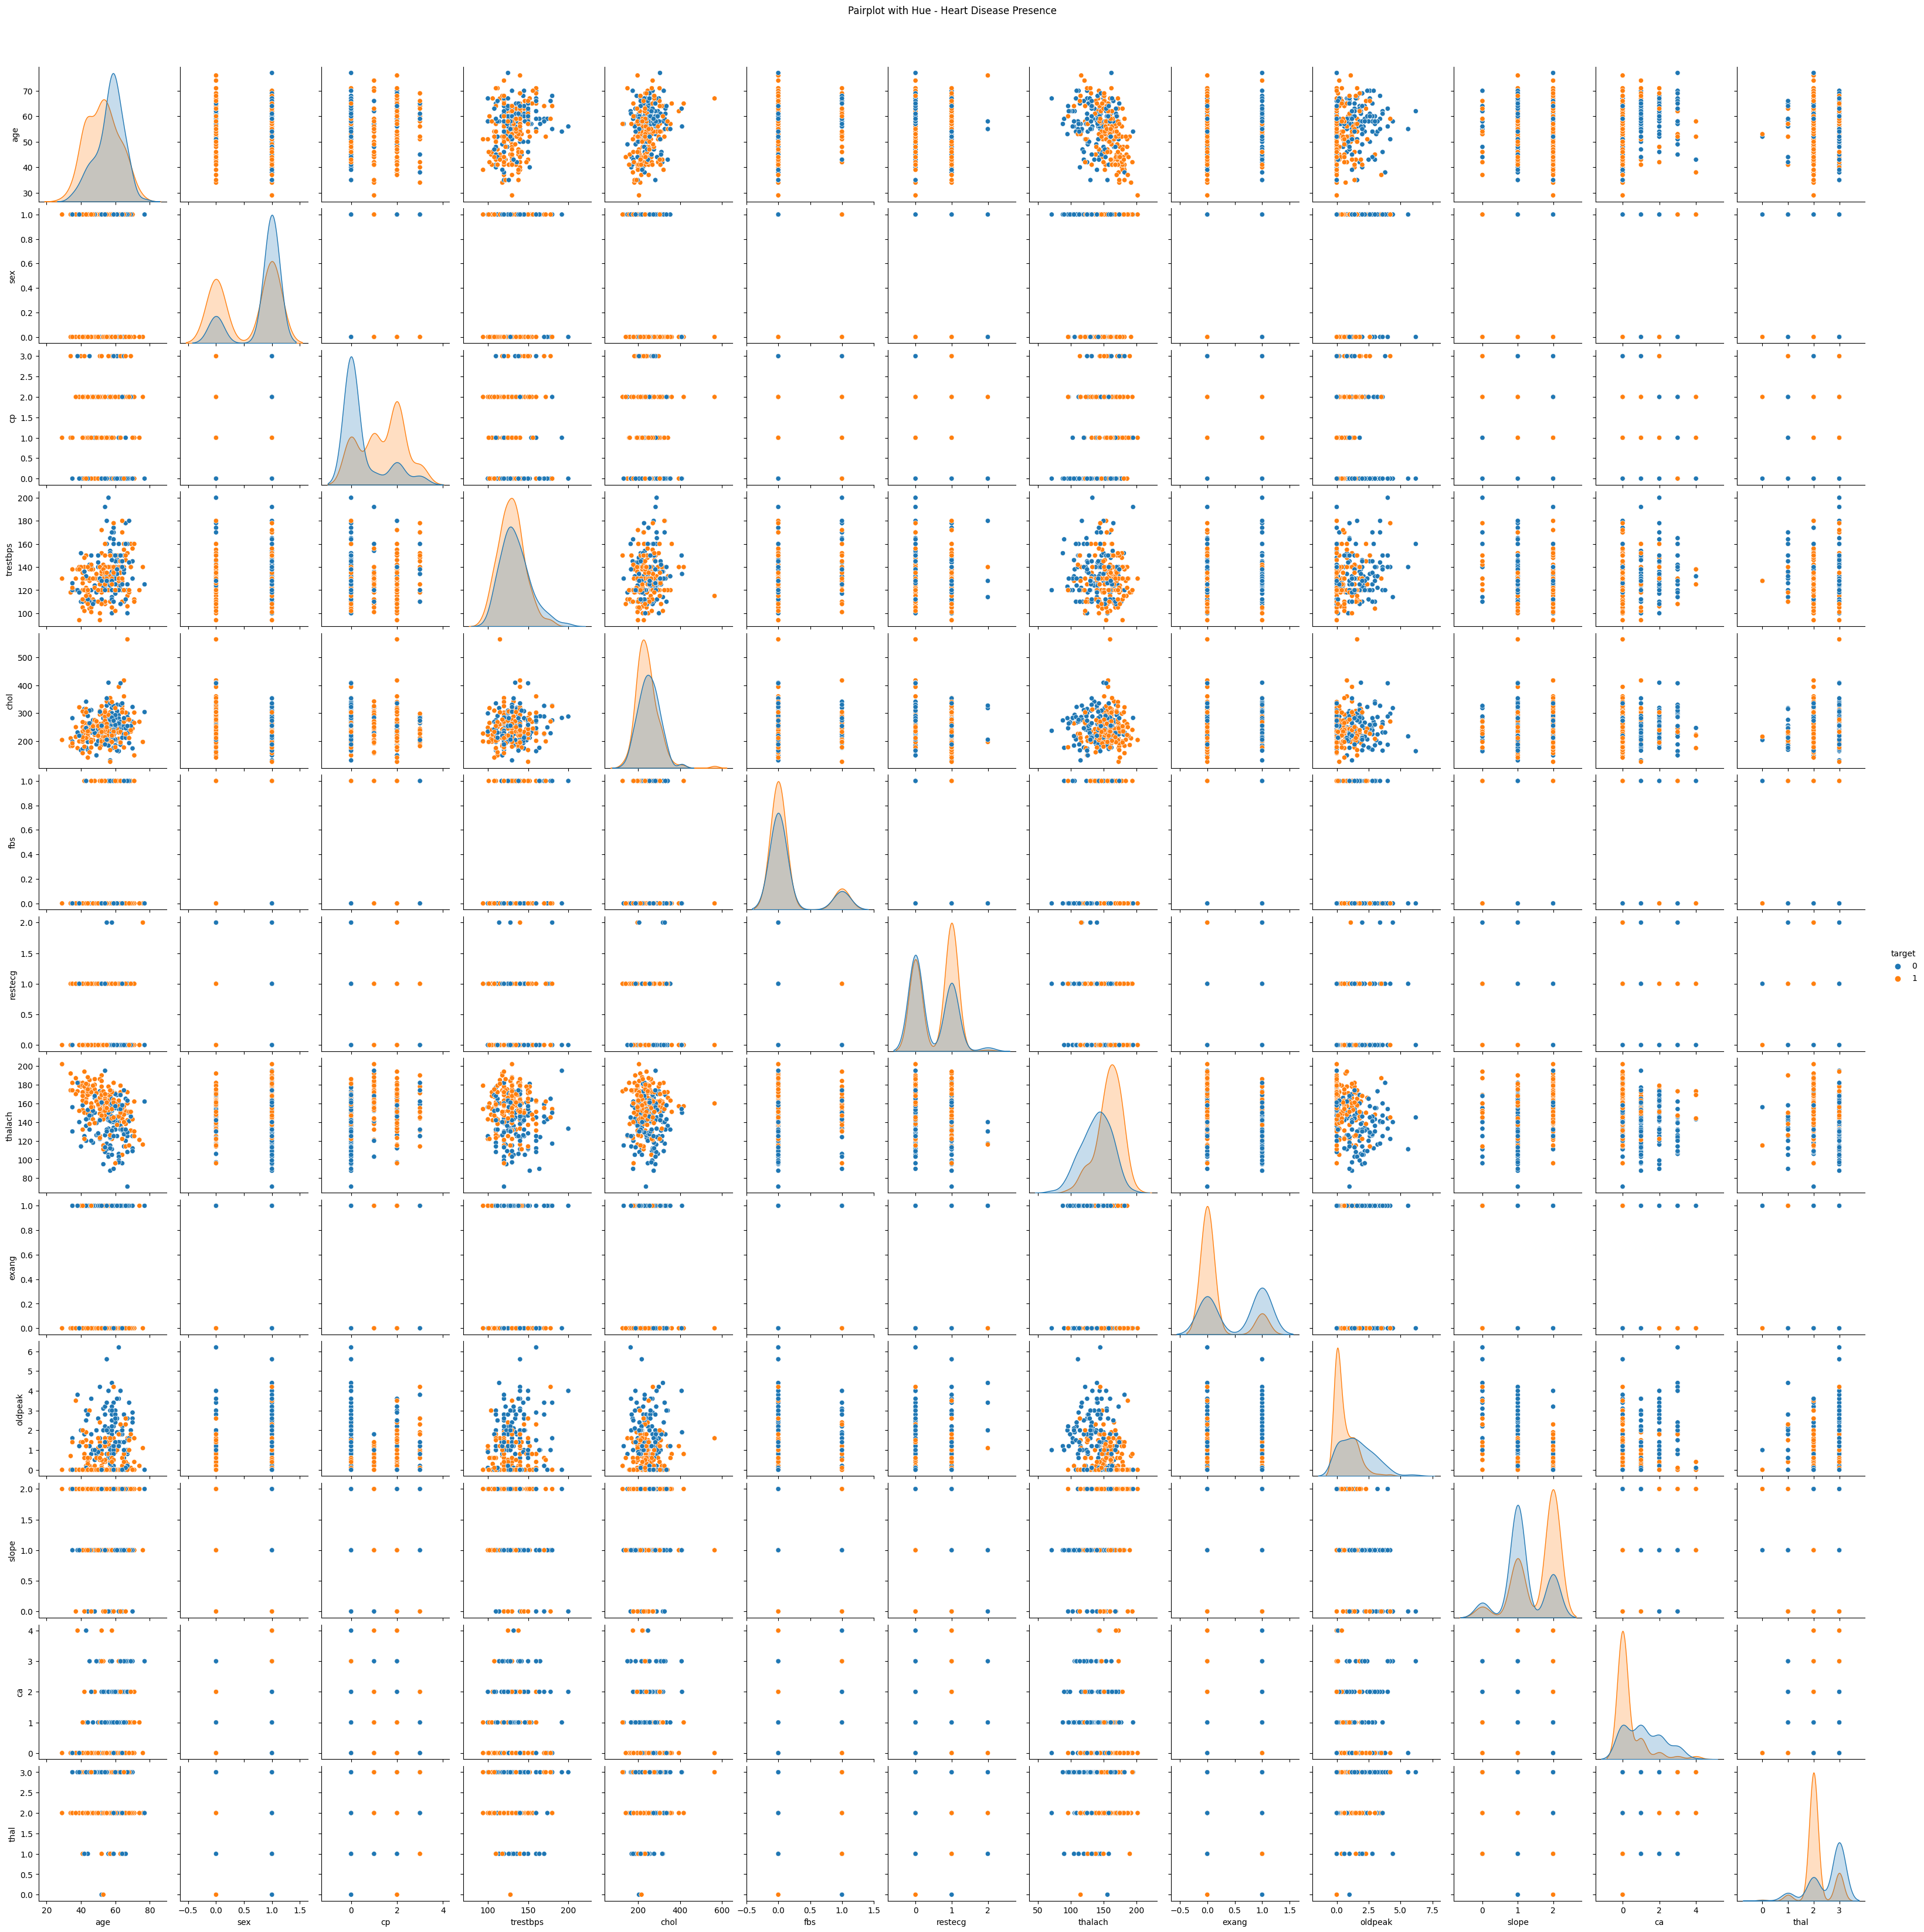

In [ ]:
# pairplot with hue as the target variable
sns.pairplot(Heart_data, hue='target', diag_kind='kde')
plt.suptitle("Pairplot with Hue - Heart Disease Presence", y=1.02)
plt.show()

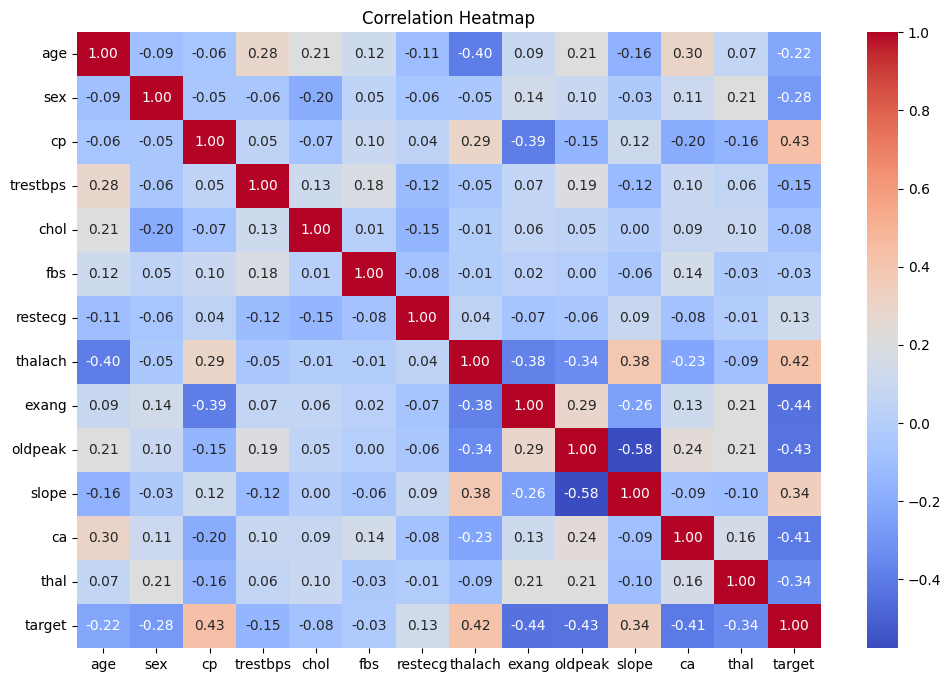

In [ ]:
# Calculating the correlation matrix
correlation_matrix = Heart_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

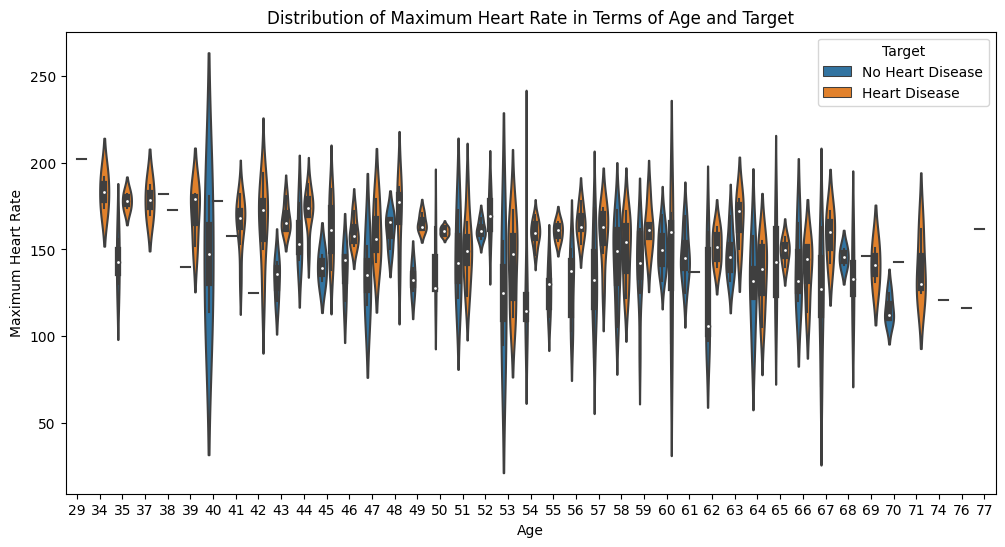

In [ ]:
# Creating a violin plot to show the distribution of maximum heart rate in terms of age and target
plt.figure(figsize=(12, 6))
sns.violinplot(x='age', y='thalach', hue='target', data=Heart_data)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Distribution of Maximum Heart Rate in Terms of Age and Target')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

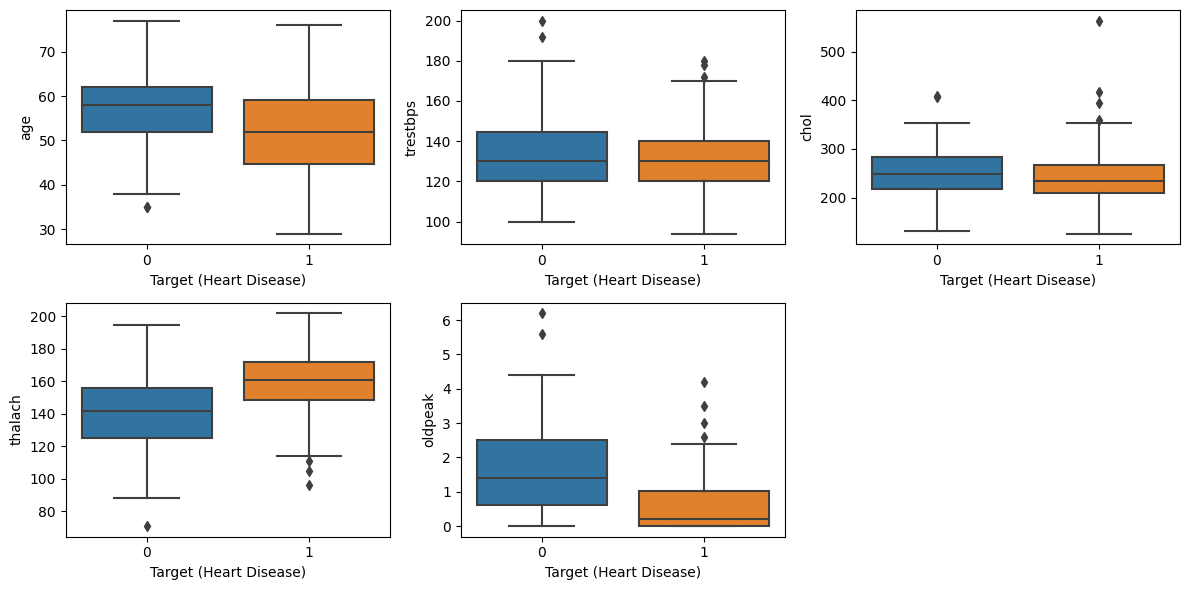

In [ ]:
plt.figure(figsize=(12, 6))
for i, attribute in enumerate(num_attributes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=attribute, data=Heart_data)
    plt.xlabel('Target (Heart Disease)')
    plt.ylabel(attribute)
plt.tight_layout()
plt.show()


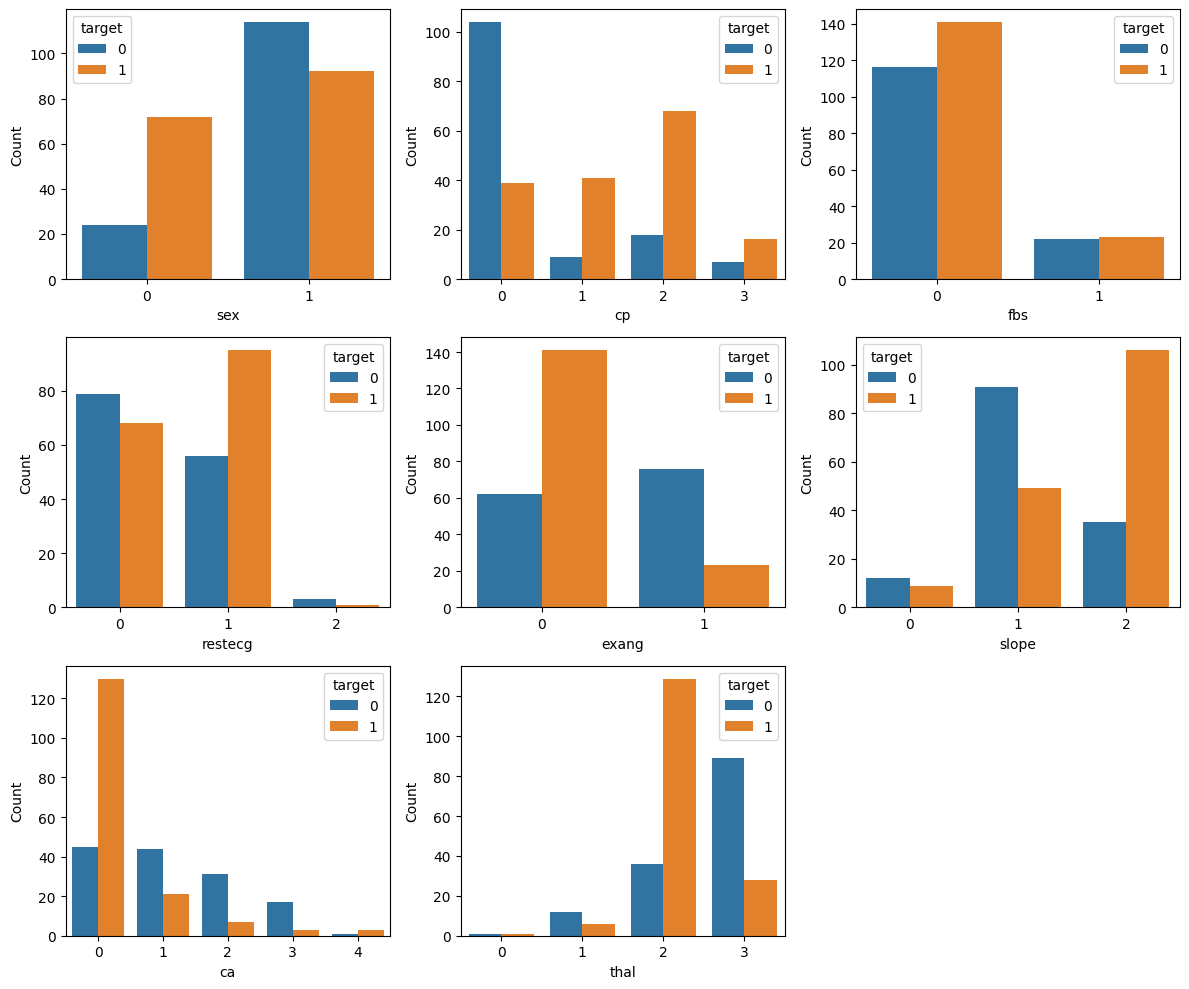

In [ ]:
plt.figure(figsize=(12, 10))
for i, attribute in enumerate(cat_attributes, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=attribute, hue='target', data=Heart_data)
    plt.xlabel(attribute)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


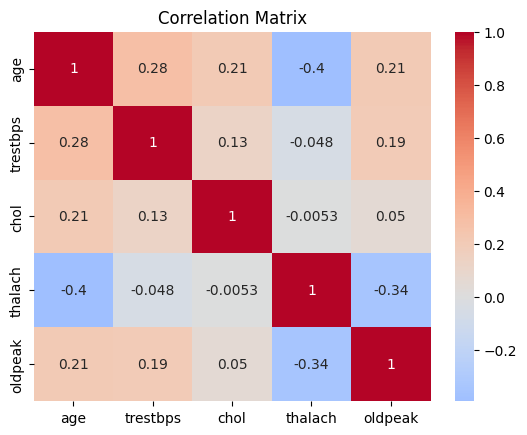

In [ ]:
correlation_matrix = Heart_data[num_attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


FEATURE SELECTION

In [ ]:
# Separate the features (X) and the target variable (y)
X = Heart_data.drop('target', axis=1)
y = Heart_data['target']

# Split the data into training and testing sets (70% training, 30% testing) and validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Verify the size of the splits
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Validation set size:",X_val.shape[0])

Training set size: 211
Testing set size: 46
Validation set size: 45


In [ ]:

#Data Normalization
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_normalized = scaler.fit_transform(X_train)

# Transform the validation and testing sets
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)


In [ ]:
#Implement and Train Classification Algorithms

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42)
}

# Train each classifier on the normalized training set
for clf_name, clf in classifiers.items():
    clf.fit(X_train_normalized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Set Performance

In [ ]:
 #Evaluate each classifier on the validation set
validation_results = {}
for clf_name, clf in classifiers.items():
    y_val_pred = clf.predict(X_val_normalized)
    validation_results[clf_name] = {
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred),
        'AUC-ROC': roc_auc_score(y_val, y_val_pred)
    }

# Convert validation results into a DataFrame for better visualization
validation_results_df = pd.DataFrame(validation_results).T

# Display the validation results
print("Validation Set Performance:")
print(validation_results_df)

Validation Set Performance:
                        Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression     0.844444   0.814815  0.916667  0.862745  0.839286
Decision Tree           0.688889   0.708333  0.708333  0.708333  0.687500
Random Forest           0.844444   0.840000  0.875000  0.857143  0.842262
Support Vector Machine  0.822222   0.807692  0.875000  0.840000  0.818452
Naive Bayes             0.822222   0.833333  0.833333  0.833333  0.821429
Neural Network          0.866667   0.875000  0.875000  0.875000  0.866071


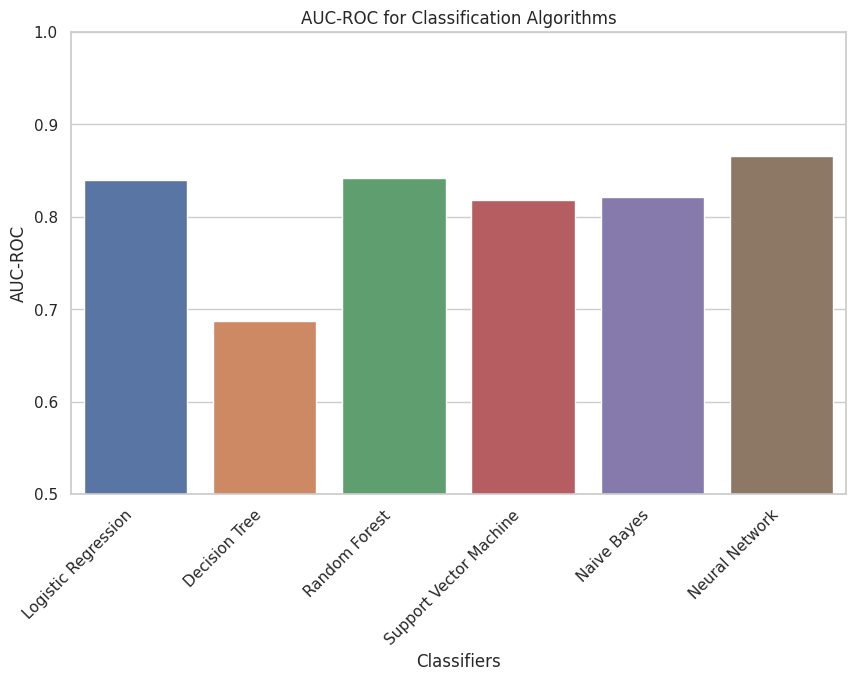

In [ ]:

# Set the style for the plots
sns.set(style="whitegrid")

# Plot AUC-ROC for each classifier
plt.figure(figsize=(10, 6))
plt.title("AUC-ROC for Classification Algorithms")
plt.xlabel("Classifiers")
plt.ylabel("AUC-ROC Score")
sns.barplot(x=validation_results_df.index, y=validation_results_df['AUC-ROC'])
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.show()


Cross-Validation Set Performance

In [ ]:

# Performing cross-validation on each classifier using the entire training set
cv_results = {}
for clf_name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_normalized, y_train, cv=5, scoring='accuracy')
    cv_results[clf_name] = cv_scores.mean()

# Convert cross-validation results into a DataFrame for better visualization
cv_results_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=['Cross-Validation Accuracy'])

# Display the cross-validation results
print("Cross-Validation Performance:")
print(cv_results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Performance:
                        Cross-Validation Accuracy
Logistic Regression                      0.805869
Decision Tree                            0.763123
Random Forest                            0.829790
Support Vector Machine                   0.810631
Naive Bayes                              0.801218
Neural Network                           0.791584


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing Set Performance

In [ ]:

# Load the trained Logistic Regression model with its best parameters
logistic_model = LogisticRegression(random_state=42)

# Load the trained Decision Tree model with its best parameters
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Load the trained Support Vector Machine model with its best parameters
svm_model = SVC(random_state=42)

# Load the trained Naive Bayes model
naive_bayes_model = GaussianNB()

# Load the trained Neural Network model with its best parameters
neural_network_model = MLPClassifier(random_state=42)

# Load the trained Random Forest model with its best parameters
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit each model on the training set
logistic_model.fit(X_train_normalized, y_train)
decision_tree_model.fit(X_train_normalized, y_train)
svm_model.fit(X_train_normalized, y_train)
naive_bayes_model.fit(X_train_normalized, y_train)
neural_network_model.fit(X_train_normalized, y_train)
random_forest_model.fit(X_train_normalized, y_train)

# Perform predictions on the testing set using each model
y_pred_test_logistic = logistic_model.predict(X_test_normalized)
y_pred_test_decision_tree = decision_tree_model.predict(X_test_normalized)
y_pred_test_svm = svm_model.predict(X_test_normalized)
y_pred_test_naive_bayes = naive_bayes_model.predict(X_test_normalized)
y_pred_test_neural_network = neural_network_model.predict(X_test_normalized)
y_pred_test_random_forest = random_forest_model.predict(X_test_normalized)

# Evaluate each classifier on the testing set
testing_results = {}

# Evaluate Logistic Regression
testing_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_test_logistic),
    'Precision': precision_score(y_test, y_pred_test_logistic),
    'Recall': recall_score(y_test, y_pred_test_logistic),
    'F1 Score': f1_score(y_test, y_pred_test_logistic),
    'AUC-ROC': roc_auc_score(y_test, y_pred_test_logistic)
}

# Evaluate Decision Tree
testing_results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_test_decision_tree),
    'Precision': precision_score(y_test, y_pred_test_decision_tree),
    'Recall': recall_score(y_test, y_pred_test_decision_tree),
    'F1 Score': f1_score(y_test, y_pred_test_decision_tree),
    'AUC-ROC': roc_auc_score(y_test, y_pred_test_decision_tree)
}

# Evaluate Support Vector Machine
testing_results['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_test_svm),
    'Precision': precision_score(y_test, y_pred_test_svm),
    'Recall': recall_score(y_test, y_pred_test_svm),
    'F1 Score': f1_score(y_test, y_pred_test_svm),
    'AUC-ROC': roc_auc_score(y_test, y_pred_test_svm)
}

# Evaluate Naive Bayes
testing_results['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_test_naive_bayes),
    'Precision': precision_score(y_test, y_pred_test_naive_bayes),
    'Recall': recall_score(y_test, y_pred_test_naive_bayes),
    'F1 Score': f1_score(y_test, y_pred_test_naive_bayes),
    'AUC-ROC': roc_auc_score(y_test, y_pred_test_naive_bayes)
}

# Evaluate Neural Network
testing_results['Neural Network'] = {
    'Accuracy': accuracy_score(y_test, y_pred_test_neural_network),
    'Precision': precision_score(y_test, y_pred_test_neural_network),
    'Recall': recall_score(y_test, y_pred_test_neural_network),
    'F1 Score': f1_score(y_test, y_pred_test_neural_network),
    'AUC-ROC': roc_auc_score(y_test, y_pred_test_neural_network)
}

# Evaluate Random Forest
testing_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_test_random_forest),
    'Precision': precision_score(y_test, y_pred_test_random_forest),
    'Recall': recall_score(y_test, y_pred_test_random_forest),
    'F1 Score': f1_score(y_test, y_pred_test_random_forest),
    'AUC-ROC': roc_auc_score(y_test, y_pred_test_random_forest)
}

# Convert testing results into a DataFrame for better visualization
testing_results_df = pd.DataFrame(testing_results).T

# Display the evaluation results on the testing set
print(testing_results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression     0.804348   0.727273  0.842105  0.780488  0.809942
Decision Tree           0.804348   0.727273  0.842105  0.780488  0.809942
Support Vector Machine  0.826087   0.720000  0.947368  0.818182  0.844055
Naive Bayes             0.869565   0.782609  0.947368  0.857143  0.881092
Neural Network          0.826087   0.761905  0.842105  0.800000  0.828460
Random Forest           0.826087   0.720000  0.947368  0.818182  0.844055


**Prediction of the Target Column**

In [ ]:

# Load the trained Naive Bayes model with its best parameters
from sklearn.naive_bayes import GaussianNB
best_naive_bayes_model = GaussianNB()

# Fit the model on the training set
best_naive_bayes_model.fit(X_train_normalized, y_train)

# Perform predictions on the testing set
y_pred_test = best_naive_bayes_model.predict(X_test_normalized)


X_test['actual_target'] = y_test
X_test['predicted_target'] = y_pred_test

# Display the DataFrame with both the actual and predicted target columns
print(X_test)



     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
106   51    1   0       140   299    0        1      173      1      1.6   
528   59    1   3       178   270    0        0      145      0      4.2   
297   58    1   0       150   270    0        0      111      1      0.8   
177   64    1   0       120   246    0        0       96      1      2.2   
245   44    1   1       130   219    0        0      188      0      0.0   
429   47    1   2       108   243    0        1      152      0      0.0   
62    67    1   0       100   299    0        0      125      1      0.9   
65    59    1   3       170   288    0        0      159      0      0.2   
5     58    0   0       100   248    0        0      122      0      1.0   
7     55    1   0       160   289    0        0      145      1      0.8   
224   51    1   0       140   261    0        0      186      1      0.0   
225   54    1   2       150   232    0        0      165      0      1.6   
32    57    

In [ ]:

cm_naive_bayes = confusion_matrix(y_val, y_val_pred)

# Get the counts of true positives and false positives
true_positives = cm_naive_bayes[1, 1]
false_positives = cm_naive_bayes[0, 1]

# Display the counts
print("True Positives:", true_positives)
print("False Positives:", false_positives)


True Positives: 21
False Positives: 3


In [ ]:
true_positives = cm_naive_bayes[1, 1]
false_positives = cm_naive_bayes[0, 1]
false_negatives = cm_naive_bayes[1, 0]
true_negatives = cm_naive_bayes[0, 0]

# Calculate evaluation metrics
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

# Display the results
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)
print("True Negatives:", true_negatives)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

True Positives: 21
False Positives: 3
False Negatives: 3
True Negatives: 18
Recall (Sensitivity): 0.875
Specificity: 0.8571428571428571
Precision: 0.875
F1 Score: 0.875
Accuracy: 0.8666666666666667
